In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from libs.SyntheticDataGenerator import fill_missing_labels, fill_synthetic_data_percentage, fill_synthetic_data_count
from gensim.models import fasttext, KeyedVectors
from transformers import GPT2LMHeadModel, GPT2Tokenizer
INPUT_FILE = "data"

data =pd.read_csv(
    filepath_or_buffer=f"../data/{INPUT_FILE}.csv",
    sep='\t',
    encoding='utf8',
    names=["ID", "Label", "Tweet"]
    )
SYNTH_METHOD = "synonyms"
fold = KFold(n_splits=5, shuffle=True, random_state=42)
data = data.sample(100)

# for train_index, test_index in fold.split(data):
#     print("TRAIN:", train_index, "TEST:", test_index)
#     X_train, X_test = data.iloc[train_index], data.iloc[test_index]
#     print(X_train)
#word2vec_model = KeyedVectors.load("H:\\word2vec-google-news-300")
#fasttext_model = fasttext.load_facebook_model(path="H:\\wiki.simple.bin").wv
#glove_model = KeyedVectors.load_word2vec_format("H:\\glove.twitter.27B.200d.txt", binary=False)
training_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

filled_data, synth_word_ratio = fill_synthetic_data_percentage(data,
                                  percentage=1,
                                  method=SYNTH_METHOD,
 #                                 word_embedding_model=glove_model,
                                  tgt_languages=["ru"],
                                  coverage_percentage=0.5)
#filled_data, synth_ratio = fill_synthetic_data_count(data=data, count=100, method=SYNTH_METHOD, use_synonym_threshold=True)
#filled_data =fill_synthetic_data_percentage(data=data, percentage=0.5,method="back_translation", synonym_percentage=0.5)
#print(f"Synthetic ratio: {synth_ratio:.3f}")
filled_data
#print(filled_data['Label'].value_counts())

In [ ]:
filled_data["Similarity"].mean()

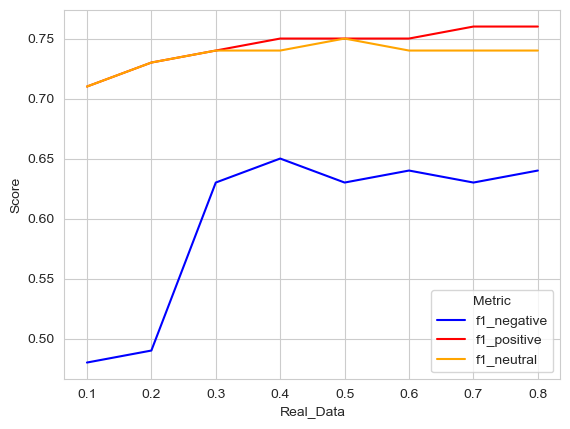

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

palette ={"f1_positive": "red", "f1_negative": "blue", "f1_neutral": "orange"}

result =pd.read_csv(
    filepath_or_buffer=f"../data/sentiment-analysis-result.csv",
    sep='\t',
    encoding='utf8'
    )

["f1_macro", "f1_weighted"]

melted_df = pd.melt(result, 
                    id_vars=["Synth_Type", "Synth_Data", "Real_Data"], 
                    value_vars=["f1_negative", "f1_positive", "f1_neutral"],
                    var_name="Metric",
                    value_name="Score")

plot = sns.lineplot(
    data=melted_df,
    x="Real_Data",
    hue="Metric",
    y="Score",
    legend="auto",
    palette=palette
)
plot.get_figure().savefig("../figures/f1_classes_real_data.svg", format="svg", dpi=1200)
plt.show()


In [1]:
from nltk.tokenize import TweetTokenizer
import numpy as np
import pandas as pd

DATA_MULTIPLIER = 1

tweet_tokenizer = TweetTokenizer()

data =pd.read_csv(
    filepath_or_buffer=f"../data/data.csv",
    sep='\t',
    encoding='utf8',
    names=["Tweet_ID", "Label", "Tweet"]
    )


data["Is_Synthetic"] = False
data["Data_Type"] = "real_data"

def token_pipeline(tweet):
    tweet = tweet.lower()
    tokens = tweet_tokenizer.tokenize(tweet)

    return tokens

data["Tweet_Token"] = data["Tweet"].apply(token_pipeline)
data['ID'] = data.reset_index().index
data = pd.DataFrame(np.repeat(data.values, DATA_MULTIPLIER, axis=0), columns=data.columns)

In [3]:
from nltk.corpus import stopwords 
stop_words = set(stopwords.words('english'))

tweet = ['awesome', 'episode', 'of', 'big', 'brother', '!', "i'm", 'totally', 'team', '..', '#may', '?', '#cleg', '?', 'love', 'it', '.', '#bbscandal']

for word in tweet:
    print(f"Word: {word} is in stopwords: {word in stop_words}")

Word: awesome is in stopwords: False
Word: episode is in stopwords: False
Word: of is in stopwords: True
Word: big is in stopwords: False
Word: brother is in stopwords: False
Word: ! is in stopwords: False
Word: i'm is in stopwords: False
Word: totally is in stopwords: False
Word: team is in stopwords: False
Word: .. is in stopwords: False
Word: #may is in stopwords: False
Word: ? is in stopwords: False
Word: #cleg is in stopwords: False
Word: ? is in stopwords: False
Word: love is in stopwords: False
Word: it is in stopwords: True
Word: . is in stopwords: False
Word: #bbscandal is in stopwords: False


In [ ]:
from libs.SyntheticDataGenerator import fill_synthetic_data_percentage, fill_missing_labels
data = data.sample(100)
data = fill_missing_labels(data,
                           method="synonyms",
                           similarity_threshold=0.5,
                           coverage_percentage=0.5,
                           word_embedding_candidates=5,
                           random_seed=42)

In [2]:
from libs.SyntheticDataGenerator import fill_synthetic_data_percentage
methods = [
        "synonyms",
        "word2vec",
        "fasttext",
        "glove",
        "fr",
        "de",
        "es",
        "ru",
        "jap",
        "gpt2",
#        "random_reorder",
        ]
percent_steps = [0.5,1]
topn_words_list= [5, 10, 15]

In [ ]:
for method in methods:
    print(f"Generating synthetic data using {method} method...")
#    for percent in percent_steps:
    data = fill_synthetic_data_percentage(data,
                                        percentage=0.05,
                                        method=method,
                                        coverage_percentage=0.5,
                                        similarity_threshold=0.5,
                                        seed_percentage=0.5,
                                        max_length_factor=2,
                                        word_embedding_candidates=5,
                                        random_seed=42)
    print("Done")

Generating synthetic data using synonyms method...


C:\Users\Rene\Documents\workspaces\synthetic-tweets-in-sentiment-analysis\libs\SyntheticDataGenerator.py:145: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  return pd.concat([data, synth_df])


Done
Generating synthetic data using word2vec method...
Done
Generating synthetic data using fasttext method...
Done
Generating synthetic data using glove method...
Done
Generating synthetic data using fr method...


C:\Users\Rene\anaconda3\envs\sentiment_analysis\lib\site-packages\transformers\generation\utils.py:1288: UserWarning: Using `max_length`'s default (512) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Done
Generating synthetic data using de method...


C:\Users\Rene\anaconda3\envs\sentiment_analysis\lib\site-packages\transformers\generation\utils.py:1288: UserWarning: Using `max_length`'s default (512) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Original text: #AmWriting
Back translation: # AmWriting # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 

C:\Users\Rene\anaconda3\envs\sentiment_analysis\lib\site-packages\transformers\generation\utils.py:1288: UserWarning: Using `max_length`'s default (512) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Done
Generating synthetic data using ru method...


C:\Users\Rene\anaconda3\envs\sentiment_analysis\lib\site-packages\transformers\generation\utils.py:1288: UserWarning: Using `max_length`'s default (512) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Done
Generating synthetic data using jap method...


C:\Users\Rene\anaconda3\envs\sentiment_analysis\lib\site-packages\transformers\generation\utils.py:1288: UserWarning: Using `max_length`'s default (512) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Original text: We want Gaga in 1st #VideoMTV2015 Fifth Harmony #MTVStars Lady Gaga
Back translation: And we went to entering into a city of Lyca, and said to it, Let us beyond the sea, beyond the wilderness. And this is the left hand of both by the wind.
Original text: SAD asks Rahul Gandhi what action he has taken against Congress leaders for  Nov 10 congregation#Pb  @Prabhuchawla  @Newindianxpress
Back translation: An A A A A A A lift A A A A A A An A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A 

In [ ]:
for method in methods:
    print(f"Generating synthetic data using {method} method...")
    data = fill_synthetic_data_percentage(data,
                                          percentage=1,
                                          method=method,
                                          similarity_threshold=0.5,
                                          coverage_percentage=0.5,
                                          word_embedding_candidates=5,
                                          random_seed=42)
    print("Done")

In [1]:
import pandas as pd

data =pd.read_csv(
    filepath_or_buffer=f"../data/synth_data_10_percent.csv",
    sep='\t',
    encoding='utf8'
    )

In [3]:
import tensorflow_hub as hub
embed = hub.load("H:\\universal-sentence-encoder_4")

data["Embedding"] = data["Tweet"].apply(lambda tweet: embed([tweet])[0])

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data["Embedding"].to_list())

data["pca-one"] = pca_result[:, 0]
data["pca-two"] = pca_result[:, 1]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
palette ={"positive": "red", "negative": "blue", "neutral": "orange"}
#grid = sns.FacetGrid(data, col="Synth_Type", hue="Label", col_wrap=3)

#grid.map(sns.scatterplot, "pca-one", "pca-two", alpha=0.5 ,legend="full")
#grid.add_legend()
scat_plot = sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="Label",
    data=data,
    legend="auto",
    style="Data_Type",
    
    palette=palette
)
             #.set(title = "Generierung über glove"))
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
data = data.reset_index()
for line in range(0,data.shape[0]):
    scat_plot.text(data["pca-one"][line]+0.01, data["pca-two"][line], 
             data["ID"][line], horizontalalignment='left', 
             size='small', color='black', weight='semibold')

scat_plot.set(title = "Generierung über GPT-2")
# sns.relplot(
#     data=data, x="pca-one", y="pca-two",
#     col="Label", hue="Label",
#     kind="scatter", col_wrap=3
# )
scat_plot.get_figure().savefig("../figures/PCA_gpt-2.svg", format="svg", dpi=1200)
# positive_data = data[data["Label"] == "positive"]
# negative_data = data[data["Label"] == "negative"]
# neutral_data = data[data["Label"] == "neutral"]
# 
# plot_neg = sns.kdeplot(
#     data=negative_data, x="pca-one", y="pca-two",  levels=20,fill=True, color="blue").set(title='Negative Tweets')
# plot_neg[0].get_figure().savefig("../figures/pca_negativ_tweets.svg", format="svg", dpi=1200)


#grid = sns.FacetGrid(data, col="Label", hue="Label", col_wrap=3)
#grid.map(sns.jointplot, "pca-one", "pca-two")
# sns.kdeplot(
#     data=data, x="pca-one", y="pca-two", hue="Label",
#     alpha=.5, fill=True, palette=palette
# )

plt.show() 

In [2]:
data

,Tweet_ID,Label,Tweet,Is_Synthetic,Data_Type,Tweet_Token,ID,Similarity,Synth_Count,Synonym_Dict,Method,Embedding,pca-one,pca-two,real-pca-one,real-pca-two,Euclidean_Distance,Cosine_Similarity
0,628604614925942784,neutral,karlie kloss celebrate twenty-third birthday b...,True,synonyms,NaN,3648,0.86,5.0,"{""'"": [], '23rd': [('twenty-third', 1.0, 'comi...",synonyms,tf.Tensor(\n[-0.06156397 -0.05556735 0.042848...,0.026763,0.102328,0.081920,0.085936,0.06,0.86
1,622920460284465152,neutral,sheamus vs aroused orton is pretty much a sund...,True,synonyms,NaN,819,0.95,2.0,"{'the': [], 'orton': [], 'sheamus': [], 'sunda...",synonyms,tf.Tensor(\n[ 4.34909947e-02 -4.61409986e-02 ...,-0.182622,-0.119558,-0.196391,-0.137742,0.02,0.95
2,636685944951840768,positive,@bsgorrie we're having a ball thanks . high-pi...,True,synonyms,NaN,9012,0.83,3.0,"{'katy': [], 'a': [('angstrom', 1.0, 'a metric...",synonyms,tf.Tensor(\n[-3.37475948e-02 -1.46745536e-02 ...,-0.036866,0.115801,-0.007952,0.197897,0.09,0.83
3,635641839144574976,neutral,brock lesnar run for a 2nd f - 5 but no ! unde...,True,synonyms,NaN,8024,0.88,1.0,"{'for': [], 'brock': [], '!': [], 'a': [('angs...",synonyms,tf.Tensor(\n[-0.04745125 -0.07365528 0.070417...,-0.239463,-0.208078,-0.237026,-0.160580,0.05,0.88
4,634824905784094720,negative,caitlyn jenner may be bear down with manslaugh...,True,synonyms,NaN,7314,0.77,3.0,"{'ne': [('neon', 1.0, 'a colorless odorless ga...",synonyms,tf.Tensor(\n[-3.84113356e-03 -6.09375685e-02 -...,0.154946,-0.185894,0.144435,-0.144519,0.04,0.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9274,631195618036183040,neutral,"few things will we give to you, who have heard...",True,jap,NaN,5058,0.33,31.0,{},jap,tf.Tensor(\n[-5.82433753e-02 -5.21778353e-02 ...,0.275022,0.019327,0.343365,-0.114961,0.15,0.33
9275,625872982251077632,neutral,Don't lay aside the cords of men. They thrust ...,True,jap,NaN,2451,0.21,16.0,{},jap,tf.Tensor(\n[ 6.61309585e-02 7.27885589e-02 ...,0.078086,-0.209969,-0.299190,-0.192771,0.38,0.21
9276,641268129700536320,neutral,"I have a cup, saying, "" lo, ready,"" and, ""Ther...",True,jap,NaN,15384,0.36,29.0,{},jap,tf.Tensor(\n[-0.00907348 -0.06713355 0.025321...,0.167715,0.075151,-0.127356,0.085153,0.30,0.36
9277,636306817400852480,neutral,"But the don't beyond the Red Sea, in the Red S...",True,jap,NaN,8684,0.22,19.0,{},jap,tf.Tensor(\n[ 0.02347011 0.05727826 0.009791...,0.089711,-0.187399,-0.457013,-0.239583,0.55,0.22


In [5]:
import numpy as np

#data["Similarity"].fillna(1, inplace=True)
tweet_ids = data["ID"].tolist() 

for id in tweet_ids:
    pca_one, pca_two = data[(data["ID"] == id) & (data["Data_Type"] == "real_data")][["pca-one", "pca-two"]].values[0]
    data.loc[data["ID"] == id, "real-pca-one"] = pca_one
    data.loc[data["ID"] == id, "real-pca-two"] = pca_two
    
def calculate_euclidean_distance(x):
    euclidean_distance = np.linalg.norm(x[0:2].values - x[2:4].values)
    return round(euclidean_distance,2)

data["Euclidean_Distance"] = data[["pca-one", "pca-two", "real-pca-one", "real-pca-two"]].apply(lambda x: calculate_euclidean_distance(x), axis=1)

IndexError: index 0 is out of bounds for axis 0 with size 0

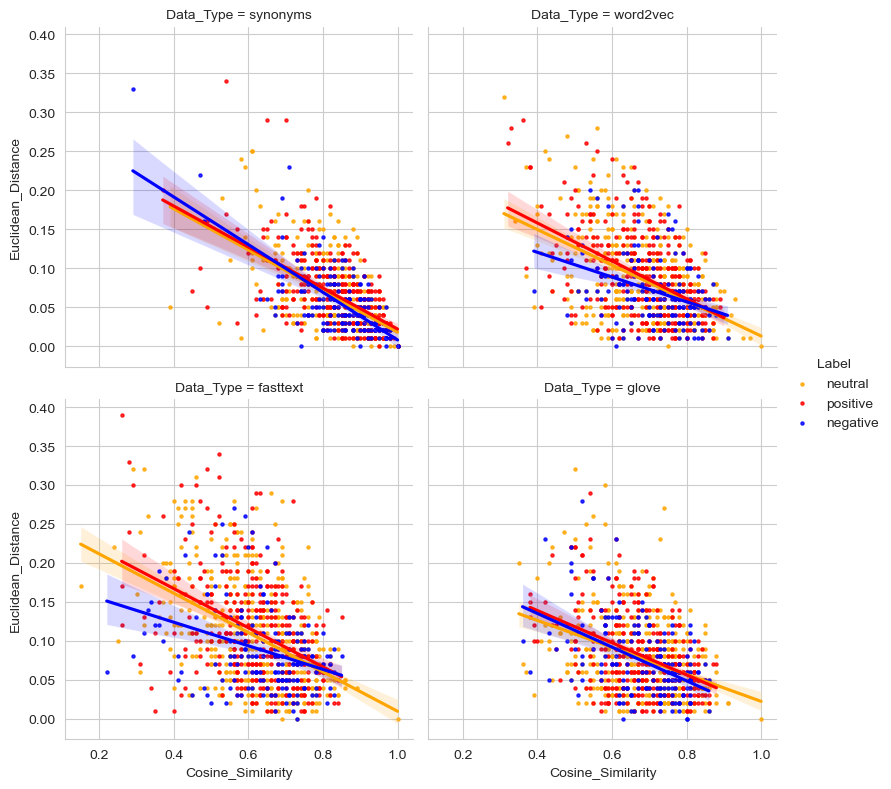

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
only_synthetic_data = data[(data["Data_Type"] != "real_data")]
paraphase_methods = ["fr","es","de"]
transformer_methods = ["synonyms", "word2vec", "fasttext", "glove"]
jap_ru = ["jap", "ru"]
only_synthetic_data["Cosine_Similarity"] = only_synthetic_data["Similarity"]
synthetic_paraphrase = only_synthetic_data[(only_synthetic_data["Data_Type"].isin(transformer_methods))]
#data_probe = only_synthetic_data.sample(2000)
palette ={"positive": "red", "negative": "blue", "neutral": "orange"}
#only_synthetic_data.to_csv("../data/synth_data_10_percent.csv", sep='\t', index=False)
# euclid_scatter = sns.scatterplot(
#     x="Similarity", y="Euclidean_Distance",
#     data=data_probe,
#     hue="Label",
#     legend="auto",
#     style="Data_Type",
#     palette=palette
# )
# negative_data = data[data["Label"] == "positive"]
# plot_neg = sns.kdeplot(
#      data=negative_data, x="Similarity", y="Euclidean_Distance",  levels=20,fill=True, color="red")

# data_probe = data_probe.reset_index(drop=True)
# for line in range(0,data.shape[0]):
#     euclid_scatter.text(data_probe["Similarity"][line]+0.01, data_probe["Euclidean_Distance"][line], 
#              data_probe["ID"][line], horizontalalignment='left', 
#              size='small', color='black', weight='semibold')
#grid = sns.FacetGrid(data, col="Data_Type", hue="Label", col_wrap=3)
#grid.map(sns.jointplot, "pca-one", "pca-two")
# sns.kdeplot(
#     data=data, x="pca-one", y="pca-two", hue="Label",
#     alpha=.5, fill=True, palette=palette
# )
implot = sns.lmplot(
    data=synthetic_paraphrase, x="Cosine_Similarity", y="Euclidean_Distance", col="Data_Type", hue="Label",
    col_wrap=2, palette=palette, legend=True, scatter_kws={"s": 5},
    height=4
)

implot.fig.savefig("../figures/Euclidean_Distance_vs_cosin_simalairty.svg", format="svg", dpi=1200)
#plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

In [19]:
len(data[(data["Data_Type"] == "synonyms")])
#data[["pca-one", "pca-two", "real-pca-one", "real-pca-two"]]
#data[(data["Data_Type"] != "real_data")]
#data["Similarity"].fillna(1, inplace=True)

1031

In [ ]:
data[(data["ID"] == 0) & (data["Method"] == "fasttext")]["Synonym_Dict"].tolist()[0]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


filtered_data = data[(data["Data_Type"] != "real_data")]
pivot_table_df = filtered_data.pivot(index='Data_Type', columns='ID', values='Similarity')
fig, ax = plt.subplots(figsize=(8,6))

heatmap =sns.heatmap(pivot_table_df, annot=True, fmt=".2f", ax=ax)
heatmap.get_figure().savefig("../figures/cosin_simalrity_gpt2.svg", format="svg", dpi=1200)

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
palette ={"positive": "red", "negative": "blue", "neutral": "orange"}
#grid = sns.FacetGrid(data, col="Synth_Type", hue="Label", col_wrap=3)

#grid.map(sns.scatterplot, "pca-one", "pca-two", alpha=0.5 ,legend="full")
#grid.add_legend()
scat_plot = sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="Label",
    data=data,
    legend="auto",
    style="Data_Typ",
    
    palette=palette
)

             #.set(title = "Generierung über glove"))
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
data = data.reset_index()
for line in range(0,data.shape[0]):
    scat_plot.text(data["pca-one"][line]+0.01, data["pca-two"][line], 
             data["ID"][line], horizontalalignment='left', 
             size='small', color='black', weight='semibold')

scat_plot.set(title = "Generierung über Synonyme")
# sns.relplot(
#     data=data, x="pca-one", y="pca-two",
#     col="Label", hue="Label",
#     kind="scatter", col_wrap=3
# )
#scat_plot.get_figure().savefig("../figures/pca_synonyme_word_coverage.svg", format="svg", dpi=1200)
# positive_data = data[data["Label"] == "positive"]
# negative_data = data[data["Label"] == "negative"]
# neutral_data = data[data["Label"] == "neutral"]
# 
# plot_neg = sns.kdeplot(
#     data=negative_data, x="pca-one", y="pca-two",  levels=20,fill=True, color="blue").set(title='Negative Tweets')
# plot_neg[0].get_figure().savefig("../figures/pca_negativ_tweets.svg", format="svg", dpi=1200)


#grid = sns.FacetGrid(data, col="Label", hue="Label", col_wrap=3)
#grid.map(sns.jointplot, "pca-one", "pca-two")
# sns.kdeplot(
#     data=data, x="pca-one", y="pca-two", hue="Label",
#     alpha=.5, fill=True, palette=palette
# )

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="Label",
    data=data,
    legend="auto",
    style="Synth_Type"
)

In [ ]:
plot_neutral = (sns.kdeplot(
    data=neutral_data, x="pca-one", y="pca-two",  levels=20,fill=True, color="orange").set(title='Neutrale Tweets'))
 
plot_neutral[0].get_figure().savefig("../figures/pca_neutral_tweets.svg", format="svg", dpi=1200)

In [ ]:
plot_positve = sns.kdeplot(
    data=positive_data, x="pca-one", y="pca-two",  levels=20,fill=True, color="red").set(title='Positive Tweets')
plot_positve[0].get_figure().savefig("../figures/pca_positive_tweets.svg", format="svg", dpi=1200)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
evaluation = {"Method": ["Synonyme", "gpt2"], "values": [[40,50,60,70],[21]], "Synthetic Ratio": [[0.1,0.2,0.3,0.4],[1,2,3,4]]}
evaluation = pd.DataFrame(evaluation)
evaluation
#sns.barplot(x="Synthetic Ratio", y="values", data=evaluation)
#plt.show()

In [ ]:
import sys
sys.path.append("/environment/notebooks/final-synthetic-with-sentiment-analysis/")
import pandas as pd
from sklearn.model_selection import train_test_split
from libs.SyntheticDataGenerator import fill_missing_labels
from libs.SentimentClassifier import preprocess, evaluation
import torch


device = torch.device('cuda' if torch.cuda.is_available() else "cpu")
print(device)
method = "gpt2"
BATCH_SIZE = 32
EPOCHS = 3

real_data_percentage = [0.1,0.1,0.1,0.1,0.1,0.1,0.1]
for method in methods:
    for percent in real_data_percentage:
        print(f"{percent*100}% Real data")
        print("")
        train_dataset, val_dataset = train_test_split(data, test_size=1-percent, random_state=42)
        filled_data = fill_missing_labels(train_dataset,
                                              method=method,
                                              coverage_percentage=0.5,
                                              similarity_threshold=0.5,
                                              seed_percentage=0.5,
                                              word_embedding_candidates=5,
                                              random_seed=42)
        print(f"length of original data: {len(train_dataset)}")
        print(f"length of filled data: {len(filled_data)}")
        sim_score = filled_data["Similarity"].mean()
        filled_data_without_duplicates = filled_data.drop_duplicates(subset='Tweet', keep="first")
        print(f"{filled_data.size - filled_data_without_duplicates.size} entries are duplicates")
        print(f"Similarity Score synthetic Data {sim_score:.2f}")
        train_dataloader = preprocess(filled_data_without_duplicates, batch_size=BATCH_SIZE)
        val_dataloader = preprocess(val_dataset, batch_size=BATCH_SIZE)
        evaluation(train_dataloader, val_dataloader, epochs=EPOCHS, device=device)
        #filled_data_without_duplicates = filled_data.drop_duplicates(subset='Tweet', keep="first")
        print(f"{filled_data.size - filled_data_without_duplicates.size} entries are duplicates")

# Create synthetic data with Synonyms

In [ ]:
import random
from nltk.corpus import wordnet
from nltk import pos_tag

SYNONYM_PERCENTAGE = 0.5
synonym_col_name = f"Synonyms_Synthetic {SYNONYM_PERCENTAGE}"

def pos_mapping(tag):
    if tag.startswith('NN'):
        return wordnet.NOUN
    elif tag.startswith('VB'):
        return wordnet.VERB
    elif tag.startswith('JJ'):
        return wordnet.ADJ
    elif tag.startswith('RB'):
        return wordnet.ADV
    else:
        return None


def replace_words_with_synonyms(tweet_tokens, percentage=0.2, similarity_threshold=0.8):
    tmp_tokens = tweet_tokens.copy()
    tokens_pos = [pos[1] for pos in pos_tag(tmp_tokens)]

    num_to_replace = int(len(tmp_tokens) * percentage)

    for _ in range(num_to_replace):
        rand_index = random.randint(0, len(tmp_tokens) - 1)

        word = tmp_tokens[rand_index]
        pos = tokens_pos[rand_index]
        synsets = wordnet.synsets(word, pos_mapping(pos))
        original_synset = synsets[0] if synsets else None
        similar_synonyms = set()

        for synset in synsets:
            for lemma in synset.lemmas():
                lemma_synset = lemma.synset()
                similarity = original_synset.wup_similarity(lemma_synset)
                if similarity and similarity >= similarity_threshold:
                    similar_synonyms.add(lemma.name())

        if len(similar_synonyms) > 0:
            tmp_tokens[rand_index] = random.choice(list(similar_synonyms))

    return ' '.join(tmp_tokens)

data["Tweet"] = data["Tweet_Token"].apply(lambda tweet: replace_words_with_synonyms(tweet, SYNONYM_PERCENTAGE))

data[["Tweet", "Label"]].to_csv(f"../output/{INPUT_FILE}_synonyms_{SYNONYM_PERCENTAGE}.csv", sep='\t', index=False)
data

In [ ]:
label_counts = data['Label'].value_counts()
print(label_counts)

# Create synthetic data with Word Embeddings

In [ ]:
from gensim.models import fasttext, KeyedVectors


fasttext_model = fasttext.load_facebook_model(path="H:\\wiki.simple.bin").wv
word2vec_model = KeyedVectors.load("H:\\word2vec-google-news-300")
glove_model = KeyedVectors.load_word2vec_format("H:\\glove.twitter.27B.200d.txt", binary=False)


In [ ]:
import random

EMBEDDING_PERCENTAGE = 0.5
fasttext_col_name = f"fasttext_Synthetic {EMBEDDING_PERCENTAGE}"
word2vec_col_name = f"word2vec_Synthetic {EMBEDDING_PERCENTAGE}"
def create_synthetic_tweet_word_embeddings(tokens, model, percentage=0.2):
    tmp_tokens = tokens.copy()
    num_words_to_replace = int(len(tmp_tokens) * percentage)
    words_to_replace = random.sample(range(len(tmp_tokens)), num_words_to_replace)

    for idx in words_to_replace:
        word = tmp_tokens[idx]
        try:
            similar_words = model.most_similar(word, topn=3)
            similar_words = [w for w, _ in similar_words if w.lower() != word.lower()]

            if similar_words:
                new_word = np.random.choice(similar_words)
                tmp_tokens[idx] = new_word
        except KeyError:
            continue
    return " ".join(tmp_tokens)

data[fasttext_col_name] = data["Tweet_Token"].apply(lambda tweet: create_synthetic_tweet_word_embeddings(tweet, fasttext_model, EMBEDDING_PERCENTAGE))
data[word2vec_col_name] = data["Tweet_Token"].apply(lambda tweet: create_synthetic_tweet_word_embeddings(tweet, word2vec_model, EMBEDDING_PERCENTAGE))
data[["Tweet_Token", fasttext_col_name, word2vec_col_name]]

# Create synthetic data with GPT2

In [ ]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

SEED_PERCENTAGE = 0.5

model_name = "gpt2"
model_col_name = f"GPT2_Synthetic {SEED_PERCENTAGE}"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

def generate_sentence(tweet_token, seed_percent=0.5):
    length_of_seed_tokens = int(len(tweet_token) * seed_percent)
    seed = " ".join(tweet_token[0:length_of_seed_tokens])

    tokenizer.pad_token = tokenizer.eos_token
    input_text = tokenizer.encode(seed, return_tensors="pt", padding=True)

    output = model.generate(input_text, max_length=len(tweet_token)*3, num_return_sequences=1, do_sample=True, temperature=0.7)
    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    generated_text = generated_text.replace("\n", "")
    return generated_text

data[model_col_name] = data["Tweet_Token"].apply(lambda tweet_tokens: generate_sentence(tweet_tokens, SEED_PERCENTAGE))
data[["Tweet_Token", model_col_name]]

# Create synthetic data with Back Translation

In [ ]:
from transformers import MarianMTModel, MarianTokenizer

tgt_languages = [
    "fr",
    "de",
#    "es",
    "ru",
#    "jap"
]
language_combinations = [
#    ("fr", "de"),
#    ("fr", "ru"),
#    ("de", "fr"),
#    ("de", "ru"),
#    ("ru", "de")
]

def back_translate(text, forw_tokenizer, forw_model, backw_tokenizer, backw_model):
    forward_input = forw_tokenizer.encode(text, return_tensors="pt")
    forward_output = forw_model.generate(forward_input)
    forward_translation = forw_tokenizer.decode(forward_output[0], skip_special_tokens=True)

    backward_input = backw_tokenizer.encode(forward_translation, return_tensors="pt")
    backward_output = backw_model.generate(backward_input)
    backward_translation = backw_tokenizer.decode(backward_output[0], skip_special_tokens=True)

    return backward_translation

def multiple_back_translate(text, first_forw_tokenizer, first_forw_model, second_forw_tokenizer, second_forw_model, second_backw_tokenizer, second_backw_model, first_backw_tokenizer, first_backw_model):
    first_forward_input = first_forw_tokenizer.encode(text, return_tensors="pt")
    first_forward_output = first_forw_model.generate(first_forward_input)
    first_forward_translation = first_forw_tokenizer.decode(first_forward_output[0], skip_special_tokens=True)

    second_forward_input = second_forw_tokenizer.encode(first_forward_translation, return_tensors="pt")
    second_forward_output = second_forw_model.generate(second_forward_input)
    second_forward_translation = second_forw_tokenizer.decode(second_forward_output[0], skip_special_tokens=True)

    second_backward_input = second_backw_tokenizer.encode(second_forward_translation, return_tensors="pt")
    second_backward_output = second_backw_model.generate(second_backward_input)
    second_backward_translation = second_backw_tokenizer.decode(second_backward_output[0], skip_special_tokens=True)

    first_backward_input = first_backw_tokenizer.encode(second_backward_translation, return_tensors="pt")
    first_backward_output = first_backw_model.generate(first_backward_input)
    first_backward_translation = first_backw_tokenizer.decode(first_backward_output[0], skip_special_tokens=True)

    return first_backward_translation

forward_models, forward_tokenizers = {}, {}
backward_models, backward_tokenizers = {}, {}

for tgt_lang in tgt_languages:
    forward_model_name = f'Helsinki-NLP/opus-mt-en-{tgt_lang}'
    backward_model_name = f'Helsinki-NLP/opus-mt-{tgt_lang}-en'
    forward_tokenizers[("en",tgt_lang)] = MarianTokenizer.from_pretrained(forward_model_name)
    forward_models[("en",tgt_lang)] = MarianMTModel.from_pretrained(forward_model_name)
    backward_tokenizers[(tgt_lang, "en")] = MarianTokenizer.from_pretrained(backward_model_name)
    backward_models[(tgt_lang, "en")] = MarianMTModel.from_pretrained(backward_model_name)

for tgt_lang_1, tgt_lang_2 in language_combinations:
    forward_model_name = f'Helsinki-NLP/opus-mt-{tgt_lang_1}-{tgt_lang_2}'
    backward_model_name = f'Helsinki-NLP/opus-mt-{tgt_lang_2}-{tgt_lang_1}'
    forward_tokenizers[(tgt_lang_1, tgt_lang_2)] = MarianTokenizer.from_pretrained(forward_model_name)
    forward_models[(tgt_lang_1, tgt_lang_2)] = MarianMTModel.from_pretrained(forward_model_name)
    backward_tokenizers[(tgt_lang_2, tgt_lang_1)] = MarianTokenizer.from_pretrained(backward_model_name)
    backward_models[(tgt_lang_2, tgt_lang_1)] = MarianMTModel.from_pretrained(backward_model_name)


translation_cache = {}

def translate_tweet(tweet, tgt_lang, second_tgt_lang=None):
    cache_key = (tweet, tgt_lang, second_tgt_lang) if second_tgt_lang else (tweet, tgt_lang)

    if cache_key in translation_cache:
        return translation_cache[cache_key]
    else:
        if second_tgt_lang:
            translation = multiple_back_translate(
                tweet,
                forward_tokenizers[("en", tgt_lang)],
                forward_models[("en", tgt_lang)],
                forward_tokenizers[(tgt_lang, second_tgt_lang)],
                forward_models[(tgt_lang, second_tgt_lang)],
                backward_tokenizers[(second_tgt_lang, tgt_lang)],
                backward_models[(second_tgt_lang, tgt_lang)],
                backward_tokenizers[(tgt_lang, "en")],
                backward_models[(tgt_lang, "en")],
            )
        else:
            translation = back_translate(
                tweet,
                forward_tokenizers[("en", tgt_lang)],
                forward_models[("en", tgt_lang)],
                backward_tokenizers[(tgt_lang, "en")],
                backward_models[(tgt_lang, "en")],
            )
        translation_cache[cache_key] = translation
        return translation

for tgt_lang in tgt_languages:
    data[f"{tgt_lang} Back_Translate_Synthetic"] = data["Tweet"].apply(lambda tweet: translate_tweet(tweet, tgt_lang))

for tgt_lang_1, tgt_lang_2 in language_combinations:
   data[f"{tgt_lang_1} - {tgt_lang_2} Back_Translate_Synthetic"] = data["Tweet"].apply(lambda tweet: translate_tweet(tweet, tgt_lang_1, tgt_lang_2))

# Synthetic Data with Synonyms + Back Translation

In [ ]:
for tgt_lang in tgt_languages:
    data[f"Synonyms + {tgt_lang} Back_Translate_Synthetic"] = data[synonym_col_name].apply(lambda tweet: translate_tweet(tweet, tgt_lang))

# Synthetic data with Back Translation + Synonyms

In [ ]:
for tgt_lang in tgt_languages:
    data[f"Back_Translate_Synthetic{tgt_lang}_Token"] = data[f"{tgt_lang} Back_Translate_Synthetic"].apply(token_pipeline)
    data[f"{tgt_lang} Back_Translate_Synthetic + Synonyms"] = data[f"Back_Translate_Synthetic{tgt_lang}_Token"].apply(lambda tweet: replace_words_with_synonyms(tweet, SYNONYM_PERCENTAGE))



# Calculate similarity scores

In [ ]:
import tensorflow_hub as hub
import Levenshtein
import numpy as np

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

def semantic_similarity(original_tweet, synthetic_tweet):
    original_embedding = embed([original_tweet])
    synthetic_embedding = embed([synthetic_tweet])
    return np.inner(original_embedding, synthetic_embedding)[0][0]

def compute_scores(data, col1, col2, prefix):
    data[f"{prefix}_Sim_Score"] = data[[col1, col2]].apply(lambda x: semantic_similarity(x[col1], x[col2]), axis=1)
    data[f"{prefix}_Levenshtein_Score"] = data[[col1, col2]].apply(lambda x: Levenshtein.distance(x[col1], x[col2]), axis=1)

compute_scores(data, "Tweet", synonym_col_name, "Synonyms")
compute_scores(data, "Tweet", fasttext_col_name, "fasttext")
compute_scores(data, "Tweet", word2vec_col_name, "word2vec")
compute_scores(data, "Tweet", model_col_name, "GPT2")

for lang in tgt_languages:
    compute_scores(data, "Tweet", f"{lang} Back_Translate_Synthetic", f"{lang} Back_Translate")
for lang in language_combinations:
    compute_scores(data, "Tweet", f"{lang[0]} - {lang[1]} Back_Translate_Synthetic", f"{lang[0]} - {lang[1]} Back_Translate")

In [ ]:
from datetime import date

today = date.today()
formatted_date = today.strftime("%d-%m-%Y")

output_file = f"{formatted_date}-synth-output-{INPUT_FILE}-syn-{SYNONYM_PERCENTAGE}-emb-{EMBEDDING_PERCENTAGE}-gen-{SEED_PERCENTAGE}-lang-{tgt_languages}.csv"

data.to_csv(f"../output/{output_file}", index=False)